# Clase 10
- Fecha 03/11/2022
- Unidad 2: **Machine learning, Regresiones lineales simples y múltiples**

## Introducción

- Supongamos que tenemos una respuesta cuantitativa $Y$ junto con $p$ variables predictoras $\bf{X= x_1, x_2,x_3, \cdots,x_p}$ y asumimos que existe una relación entre $X$ e $Y$ que puede escribirse en forma general como:

$$Y=f(\bf{X}) + \epsilon$$

Donde $f$ es una función desconocida que depende de $\bf{X= x_1, x_2,x_3, \cdots,x_p}$ y que $\epsilon$ es un término de error aleatorio que es independiente de las **X** y que tiene media cero.

### ¿Por qué y para qué estimar $f$?

- **Predicción:** a partir de nuevos valores de **X** queremos conocer **Y**.
- **Inferencia:** comprender la forma en que **Y** se ve afectado cuando cambian **X**, se busca entender la relación.




### ¿Cómo estimar $f$?

- **Métodos paramétricos,** implican 2 pasos:
    - Asumir la forma de la función $f$, **por ejemplo lineal**. 

    $$f(X)=\beta_0 + \beta_1X_1 + \beta_2X_2+\cdots+\beta_p+X_p$$
    
    La ventaja que tiene es que en vez de tener que estimar enteramente una función arbitraria, únicamente necesitamos estimar los $p+1$ coeficientes $\beta_0,\beta_1,\beta_2, \cdots,\beta_p$.
    
    - Ajustar o entrenar (fit o train) el modelo con los datos (de entrenamiento). En el caso lineal estimar los parámetros $\beta_0,\beta_1,\beta_2, \cdots,\beta_p$, esto es:
    
    $$Y \approx \beta_0 + \beta_1X_1 + \beta_2X_2+\cdots+\beta_p+X_p$$
    
    El enfoque mas común es ajustar el modelo con (nos ponemos de pié) **mínimos cuadrados ordinarios** (Grossman, Álgebra Lineal, cap. 4.10; Burden-Faires, Numerical Analysis, cap. 7.1). Ver ejemplo: https://ml-regression.gitlab.io/scatter3d.html

- **Métodos no paramétricos**: no asumen una forma explícita de $f$, sino que encuentran una estimación de $f$ que se acerque a los puntos datos tanto como sea posible sin sobreajustar forzozamente a los datos (overfitting). Como ventaja es que al no asumir una $f$ de forma anticipada, se adapta a un gran número de problemas, como desventaja es que el problema no se reduce a unos pocos parámetros (caja negra) y que se requieren una gran cantidad de observaciones para obtener una estimación precisa de $f$. Algunos ejemplos de estos métodos son:
    - K-nearest neighbors (ver este ejemplo: https://www.dataquest.io/blog/k-nearest-neighbors-in-python/)
    - Random Forest
    - Support Vector Regression

### ¿Cómo evaluamos los modelos?

- Diferenciar datos en train set y test set (training/testing sets)
- Usar $\text{RMSE}$, $\text{MSE}$, $R^2$, $R^2 \text{ajustado}$, etc.

### Sigamos con 

- https://mlu-explain.github.io/linear-regression/

Algunos artículos con ejemplos interesantes:

- https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
- https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

### Ejemplo 1

- Dos sensores de humedad de suelo diferentes (sobretodo en precio). Uno de ellos es el sensor de referencia, el sensor confiable. El otro, mucho más económico, lo calibraremos.



$$\begin{equation} \label{eq:Calib}
y_i = f(\beta,{\bf{x}}_i) + \epsilon_i
\end{equation}$$

- $i$=1,$\cdots$, N observaciones/mediciones, 
- $f(\cdot)$ función para calibrar el sensor 
- $\epsilon_i$ ruido aleatorio de distribución normal N(0, $\sigma^2$). 
- $\beta$ parámetros del modelo a ser optimizado
- ${\bf{x}}_i$=[x$_{i1}$, $\dots$, x$_{iM}$] vector que incluye mediciones a calibrar (y puede contener otras mediciones externas)

Ver: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_ej1 = pd.read_csv("datos/humedad_suelo.csv")

### Análisis exploratorio de datos
1. filtrado y limpieza de datos
2. visualización

In [3]:
data_ej1

datetime sensor     id     sm     sc     st   fst    sc2  \
0      2022-10-18 00:00:00      v   3.92    NaN    NaN    NaN   NaN    NaN   
1      2022-10-18 00:00:00     h1  11.00  0.150  0.006  19.91  67.8  0.006   
2      2022-10-18 00:00:00      d   0.82    NaN    NaN    NaN   NaN    NaN   
3      2022-10-18 00:01:01      v   3.92    NaN    NaN    NaN   NaN    NaN   
4      2022-10-18 00:01:01     h1  11.00  0.147  0.006  19.91  67.8  0.006   
...                    ...    ...    ...    ...    ...    ...   ...    ...   
49756  2022-10-29 12:26:02     h1  11.00  0.085  0.005  26.41  79.5  0.005   
49757  2022-10-29 12:26:02      d   0.70    NaN    NaN    NaN   NaN    NaN   
49758  2022-10-29 12:27:03      v   3.91    NaN    NaN    NaN   NaN    NaN   
49759  2022-10-29 12:27:03     h1  11.00  0.085  0.005  26.41  79.5  0.005   
49760  2022-10-29 12:27:03      d   0.70    NaN    NaN    NaN   NaN    NaN   

           rp     ip    rpc    ipc  
0         NaN    NaN    NaN    NaN  
1      9.1201  1.997  9.218  2.153  
2         NaN    NaN    NaN    NaN  
3         NaN    NaN    NaN    NaN  
4      8.9601  2.107  9.059  2.269  
...       ...    ...    ...    ...  
49756  5.8541  1.762  6.013  1.713  
49757     NaN    NaN    NaN    NaN  
49758     NaN    NaN    NaN    NaN  
49759  5.8541  1.762  6.013  1.713  
49760     NaN    NaN    NaN    NaN  

[49761 rows x 12 columns]

La información está **mezclada**. En la columna "sensor" nos indica de donde provienen los datos:

- tipo `h1`: sensor de referencia
- tipo `d`: sensor barato

- Para los datos del sensor `h1`, la humedad de suelo se encuentra en la columna `sm`
- Para el sensor `d`, la humedad de suelo se encuentra en la columna `id`

In [8]:
idx_h1 = data_ej1["sensor"] == "h1"
idx_d  = data_ej1["sensor"] == "d"

ref = data_ej1[idx_h1]
bar = data_ej1[idx_d]

/tmp/ipykernel_5910/2025011121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref.loc[:,"barato"] = bar["id"]


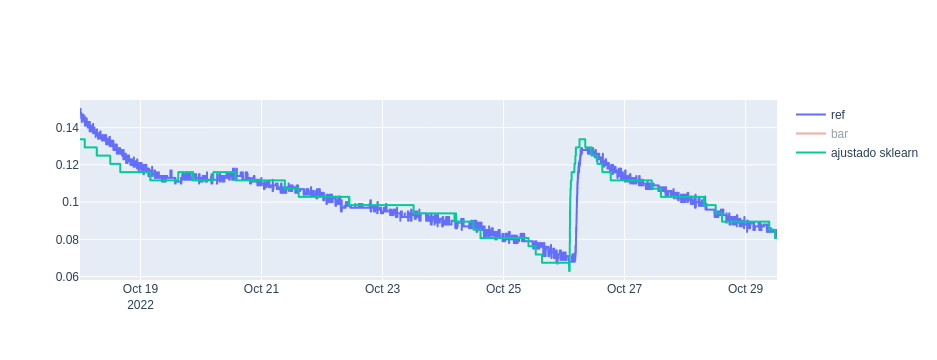

In [55]:
# vamos a hacer la regresión a ojo (visualmente)
fig1 = go.Figure()
fig1.add_trace(go.Scattergl(x=ref["datetime"], y=ref["sm"], name="ref"))
fig1.add_trace(go.Scattergl(x=bar["datetime"], y=0.55*bar["id"]-0.31, name="bar"))
fig1.add_trace(go.Scattergl(x=bar["datetime"], y=0.44229927*bar["id"]-0.22889848366019624, name="ajustado sklearn"))


In [47]:
# ahora lo hacemos con sklearn

# bar["id"] es mi única variable predictora (feature): tiene que ir como columna   (.to_numpy().reshape(-1, 1))
# ref["sm"] mi variable objetivo (target)
X = bar["id"].to_numpy().reshape(-1, 1)
y = ref["sm"]

In [49]:
X.shape

(16588, 1)

In [50]:
# creo el modelo lineal
lm = LinearRegression()

# ajusto el modelo
ajuste = lm.fit(X, y)

In [51]:
# Veamos el coeficiente de determinación R²
ajuste.score(X,y)

0.8565474874448892

In [53]:
# veamos la pendiente Beta 1
ajuste.coef_

array([0.44229927])

In [54]:
# veamos el desplazamiento (offset o bias o intercept) Beta 0
ajuste.intercept_

-0.22889848366019624

- Veamos entonces cómo obtener ("predecir") el valor de $y$ para un nuevo valor de $x$

In [58]:
x_nuevo = np.array([[0.08]])
x_nuevo

array([[0.08]])

In [59]:
ajuste.predict(x_nuevo)

array([-0.19351454])

In [60]:
#PENDIENTE*x_nuevo - DESPLAZAMIENTO
pendiente = 0.44229927
desplazamiento = -0.22889848366019624

y_aprox = pendiente*x_nuevo + desplazamiento
y_aprox

array([[-0.19351454]])

In [35]:
# veamos nuevamente la gráfica usando los parámetros del ajuste

### Ejercicio DESAFÍO: dos variables predictoras
- Pueden hacer con otro dataset, por ejemplo: `housing.csv`

In [61]:
data_ej2 = pd.read_csv("datos/humedad_suelo_2d.csv")
data_ej2

datetime  tempC       c80     hs
0     2021-06-16 19:00:48  12.71  1.764418  0.340
1     2021-06-16 19:32:44   9.31  1.730205  0.344
2     2021-06-16 20:02:29   8.81  1.720430  0.348
3     2021-06-16 20:32:30   8.51  1.720430  0.350
4     2021-06-16 21:02:30   8.41  1.715543  0.350
...                   ...    ...       ...    ...
4205  2021-09-22 14:02:39  18.81  1.891496  0.168
4206  2021-09-22 14:32:39  19.11  1.891496  0.168
4207  2021-09-22 15:02:39  19.31  1.891496  0.168
4208  2021-09-22 15:32:39  19.51  1.886608  0.168
4209  2021-09-22 16:02:36  20.71  1.886608  0.167

[4210 rows x 4 columns]

- Veamos los datos haciendo $$hs = f(tempC,c80)$$

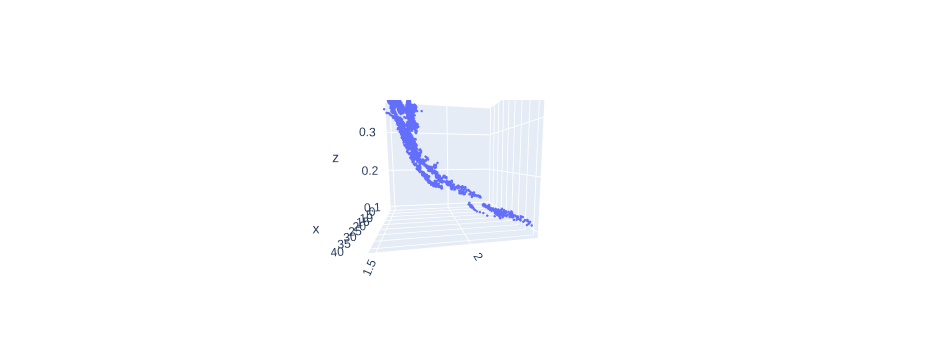

In [62]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter3d(x=data_ej2["tempC"],y=data_ej2["c80"], z=data_ej2["hs"], mode="markers", marker=dict(size=0.8)))